In [13]:
!pip install yellowbrick

In [15]:
%run start.py

In [79]:
w = pd.read_csv('data/chick004.csv')
w.head(3)

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13


In [24]:
w.info()
w.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


,weight,egg_weight,movement,food
count,30.00000,30.000000,30.000000,30.000000
mean,137.60000,65.100000,137.666667,12.733333
std,6.97582,2.856933,20.800088,1.311312
min,125.00000,61.000000,102.000000,10.000000
25%,133.00000,62.250000,121.000000,12.000000
50%,138.00000,65.000000,138.000000,13.000000
75%,143.00000,67.000000,156.250000,13.000000
max,148.00000,70.000000,174.000000,15.000000


In [34]:
w2 = w.iloc[:,1:5]
w2.head(3)

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13


## statsmodels라이브러리의 OLS 이용한 단순회귀분석

In [38]:
# 1. 모델구축
# 종란무게 - 병아리무게 단순선형회귀모델 구축
model_lm = smf.ols(formula = 'weight ~ egg_weight', data = w2)
model_lm

In [42]:
result_lm = model_lm.fit()

In [44]:
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.32e-16
Time:                        09:14:55   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

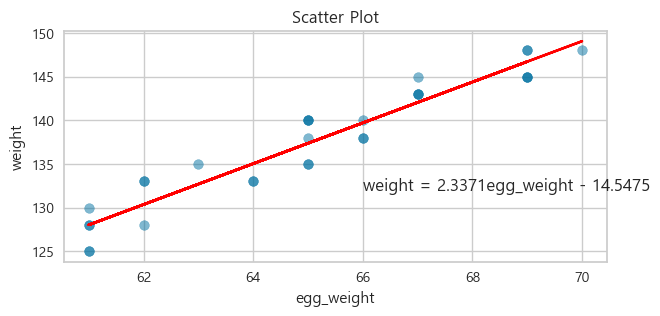

In [46]:
# 종란무게에 따른 병아리무게 산점도
plt.figure(figsize = (7,3))

plt.scatter(w.egg_weight, w.weight, alpha = .5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color = 'red')

plt.text(66, 132, 'weight = 2.3371egg_weight - 14.5475', fontsize = 12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show()

In [50]:
## sklearn 라이브러리 LinearRegression 이용한 단순회귀분석
from sklearn.linear_model import LinearRegression

In [52]:
x = w2[['egg_weight']]     ## 독립변수
y = w2['weight']           ## 종속변수, 하나의 열(Series)로 정의, 모델이 결과를 출력할 때도 1차원으로 반환함

In [54]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [56]:
y_pred = model.predict(x)
y_pred

array([137.36628644, 130.35487959, 137.36628644, 137.36628644,
       146.7148289 , 137.36628644, 128.01774398, 146.7148289 ,
       135.02915082, 146.7148289 , 142.04055767, 128.01774398,
       130.35487959, 142.04055767, 146.7148289 , 128.01774398,
       149.05196451, 128.01774398, 142.04055767, 146.7148289 ,
       128.01774398, 135.02915082, 139.70342205, 142.04055767,
       137.36628644, 139.70342205, 137.36628644, 139.70342205,
       130.35487959, 132.69201521])

In [60]:
import numpy as np
x2 = np.array([55,44,58,61,72,68]).reshape(-1,1)
model.predict(x2)

array([113.99493029,  88.28643853, 121.00633714, 128.01774398,
       153.72623574, 144.37769328])

In [62]:
## 모델 결과
coef = model.coef_[0]  # 회귀계수 (기울기)
intercept = model.intercept_  # 절편
print(f"회귀식: weight = {coef:.4f} * egg_weight + {intercept:.4f}")

회귀식: weight = 2.3371 * egg_weight + -14.5475


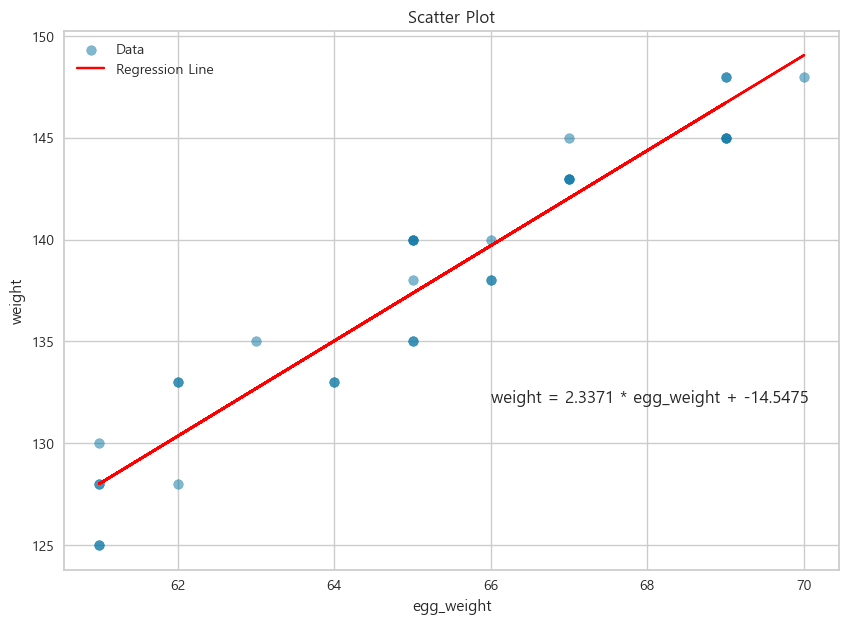

In [64]:
plt.figure(figsize=(10, 7))
plt.scatter(w2['egg_weight'], w2['weight'], alpha=0.5, label='Data')
plt.plot(w2['egg_weight'], y_pred, color='red', label='Regression Line')
plt.text(66, 132, f'weight = {coef:.4f} * egg_weight + {intercept:.4f}', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.legend()
plt.show()

## 다중 회귀 분석

In [67]:
model2 = smf.ols(formula = 'weight ~ egg_weight + food + movement', data = w2)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           8.46e-17
Time:                        09:34:36   Log-Likelihood:                -56.008
No. Observations:                  30   AIC:                             120.0
Df Residuals:                      26   BIC:                             125.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9748      8.587      0.346      0.732     -14.676      20.626
egg_weight     1.7763      0.195      9.117      0.000       1.376       2.177
food           1.5847      0.405      3.915      0.001       0.753       2.417
movement      -0.0087      0.017     -0.522      0.606      -0.043       0.026
==============================================================================
Omnibus:                        1.993   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.746
Skew:                          -0.480   Prob(JB):                        0.418
Kurtosis:                       2.311   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model2 = smf.ols(formula = 'weight ~ egg_weight + food', data = w2)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           5.44e-18
Time:                        09:37:30   Log-Likelihood:                -56.164
No. Observations:                  30   AIC:                             118.3
Df Residuals:                      27   BIC:                             122.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6638      8.370      0.438      0.665     -13.510      20.837
egg_weight     1.7453      0.183      9.536      0.000       1.370       2.121
food           1.5955      0.399      4.001      0.000       0.777       2.414
==============================================================================
Omnibus:                        2.302   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                1.940
Skew:                          -0.502   Prob(JB):                        0.379
Kurtosis:                       2.263   Cond. No.                     1.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
x = w2[["egg_weight", "food"]] 
y = w2["weight"] 

In [73]:
model3 = LinearRegression()
model3.fit(x,y)

LinearRegression()

In [75]:
print("Intercept (절편):", model3.intercept_)
print("Coefficients (회귀 계수):", model3.coef_)

Intercept (절편): 3.663849948712908
Coefficients (회귀 계수): [1.74532311 1.5954672 ]


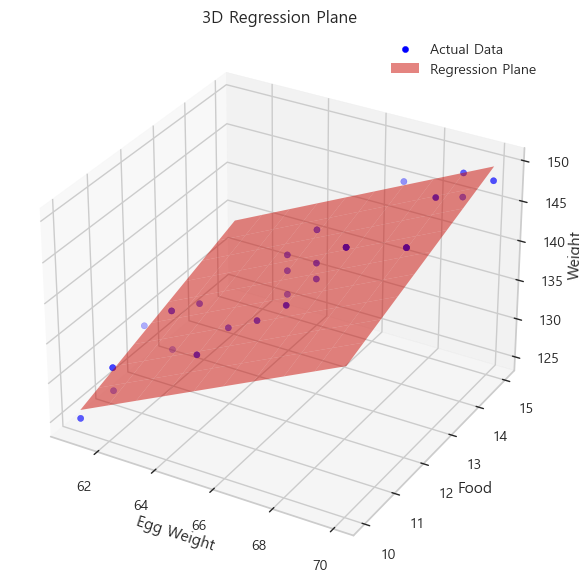

In [77]:
# 3D 그래프 준비
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(w2["egg_weight"], w2["food"], w2["weight"], c='blue', label='Actual Data')

x_range = np.linspace(w2["egg_weight"].min(), w2["egg_weight"].max(), 10)
y_range = np.linspace(w2["food"].min(), w2["food"].max(), 10)
X_range, Y_range = np.meshgrid(x_range, y_range)

Z_range = model3.intercept_ + model3.coef_[0] * X_range + model3.coef_[1] * Y_range

ax.plot_surface(X_range, Y_range, Z_range, color='r', alpha=0.5, label='Regression Plane')

ax.set_xlabel("Egg Weight")
ax.set_ylabel("Food")
ax.set_zlabel("Weight")
ax.set_title("3D Regression Plane")
ax.legend()
plt.show()